In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plFuns import *
plt.rcParams['figure.figsize']=[32,18]

In [2]:
countries=['EN','ES','NL']
seasons=pd.Series({_cntr:Season(_cntr) for _cntr in countries})

In [3]:
utd=seasons['EN'].Teams['Man United']
city=seasons['EN'].Teams['Man City']
tot=seasons['EN'].Teams['Tottenham']
chel=seasons['EN'].Teams['Chelsea']
barca=seasons['ES'].Teams['Barcelona']
rm=seasons['ES'].Teams['Real Madrid']
pool=seasons['EN'].Teams['Liverpool']

In [4]:
seasons['EN'].all.tail(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG
240,2018-01-30,Huddersfield,Liverpool,0,3
241,2018-01-30,Swansea,Arsenal,3,1
242,2018-01-30,West Ham,Crystal Palace,1,1
243,2018-01-31,Chelsea,Bournemouth,0,3
244,2018-01-31,Everton,Leicester,2,1
245,2018-01-31,Man City,West Brom,3,0
246,2018-01-31,Newcastle,Burnley,1,1
247,2018-01-31,Southampton,Brighton,1,1
248,2018-01-31,Stoke,Watford,0,0
249,2018-01-31,Tottenham,Man United,2,0


In [5]:
for _season in seasons:
    print(_season.url)
    _season.calibrate()

http://www.football-data.co.uk/mmz4281/1718/E0.csv
http://www.football-data.co.uk/mmz4281/1718/SP1.csv
http://www.football-data.co.uk/mmz4281/1718/N1.csv


In [6]:
for _season in seasons:
    _season.SimulateRestOfSeason(nScenarios=int(1e5))

In [7]:
seasons['EN'].get_all_results()

,Average Goals Against,Average Goals Scored,Average Points,CL,GA,GF,Points,Relegated,Win,lambda,tau
Man City,29.28,111.51,100.08,100.000,18,73,68,0.000,99.979,2.316,0.205
Man United,30.53,73.89,79.01,91.841,18,49,53,0.000,0.016,1.244,0.202
Liverpool,41.41,87.60,78.60,91.056,29,57,50,0.000,0.004,1.650,0.320
Chelsea,32.00,66.80,74.00,55.742,19,45,50,0.000,0.001,1.089,0.224
Tottenham,35.39,74.92,73.94,59.183,22,49,48,0.000,0.000,1.318,0.232
Arsenal,52.03,70.69,64.34,2.172,34,46,42,0.000,0.000,1.217,0.653
Leicester,50.64,56.33,54.11,0.004,34,37,34,0.004,0.000,0.839,0.604
Burnley,33.80,33.11,54.11,0.002,22,20,35,0.000,0.000,0.285,0.178
Everton,61.13,42.73,45.40,0.000,40,28,31,1.805,0.000,0.433,0.920
Bournemouth,54.58,43.68,44.19,0.000,36,28,28,2.952,0.000,0.579,0.775


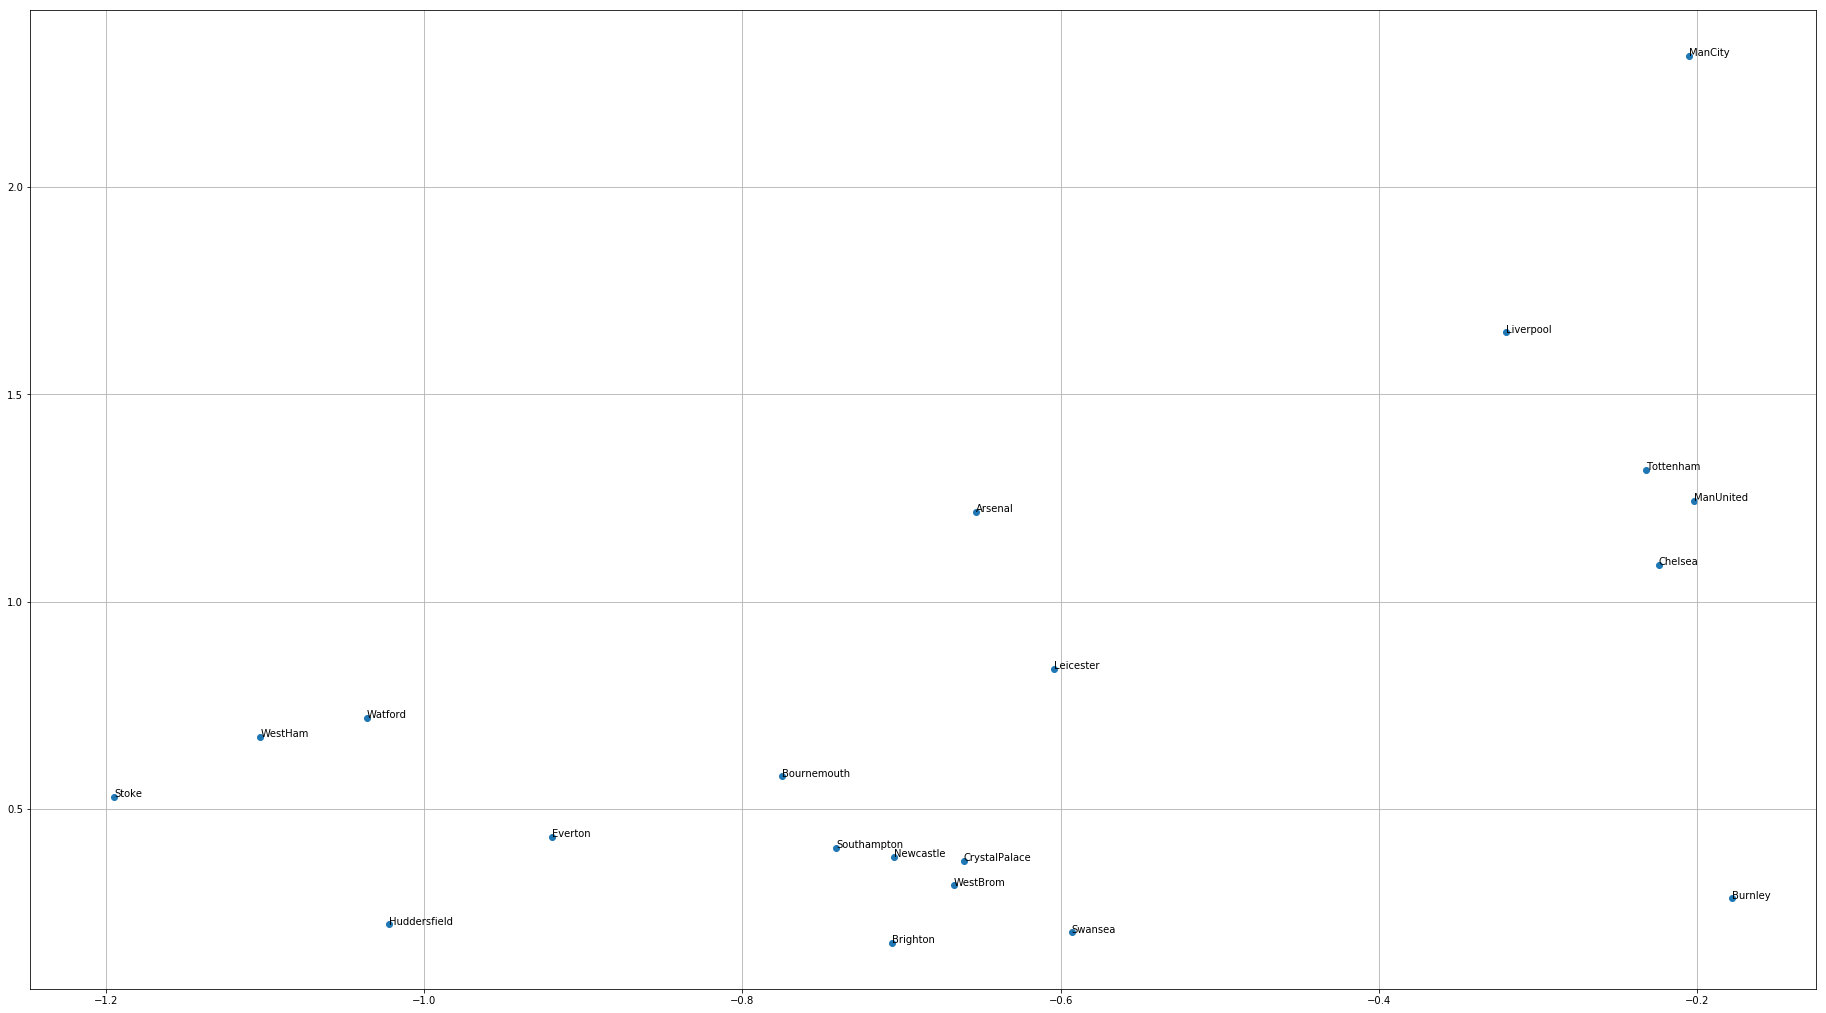

In [8]:
for ssn in ['EN']:
    results=seasons[ssn].get_all_results()
    x=-results['tau']
    y=results['lambda']
    nms=list(results.index)
    plt.scatter(x,y)
    for i, txt in enumerate(nms):
        plt.annotate(txt.replace(' ',''), (x[i],y[i]))    
plt.grid(True)
fig=plt.gcf()
fig.set_size_inches(32,18)
plt.savefig('ratings.pdf')

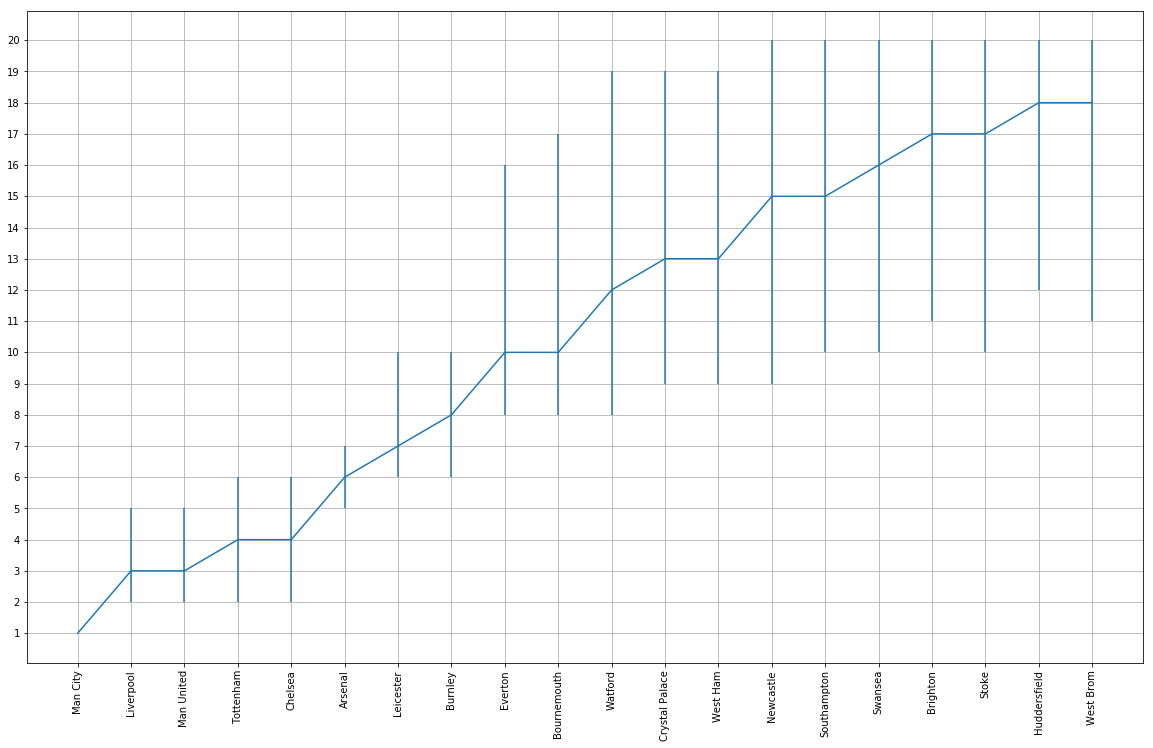

In [9]:
seasons['EN'].conf_int_plot(95,kind='')

In [10]:
pool + city

array([ 0.2653,  0.1848,  0.5499])

In [11]:
utd+tot 

array([ 0.3694,  0.2296,  0.401 ])

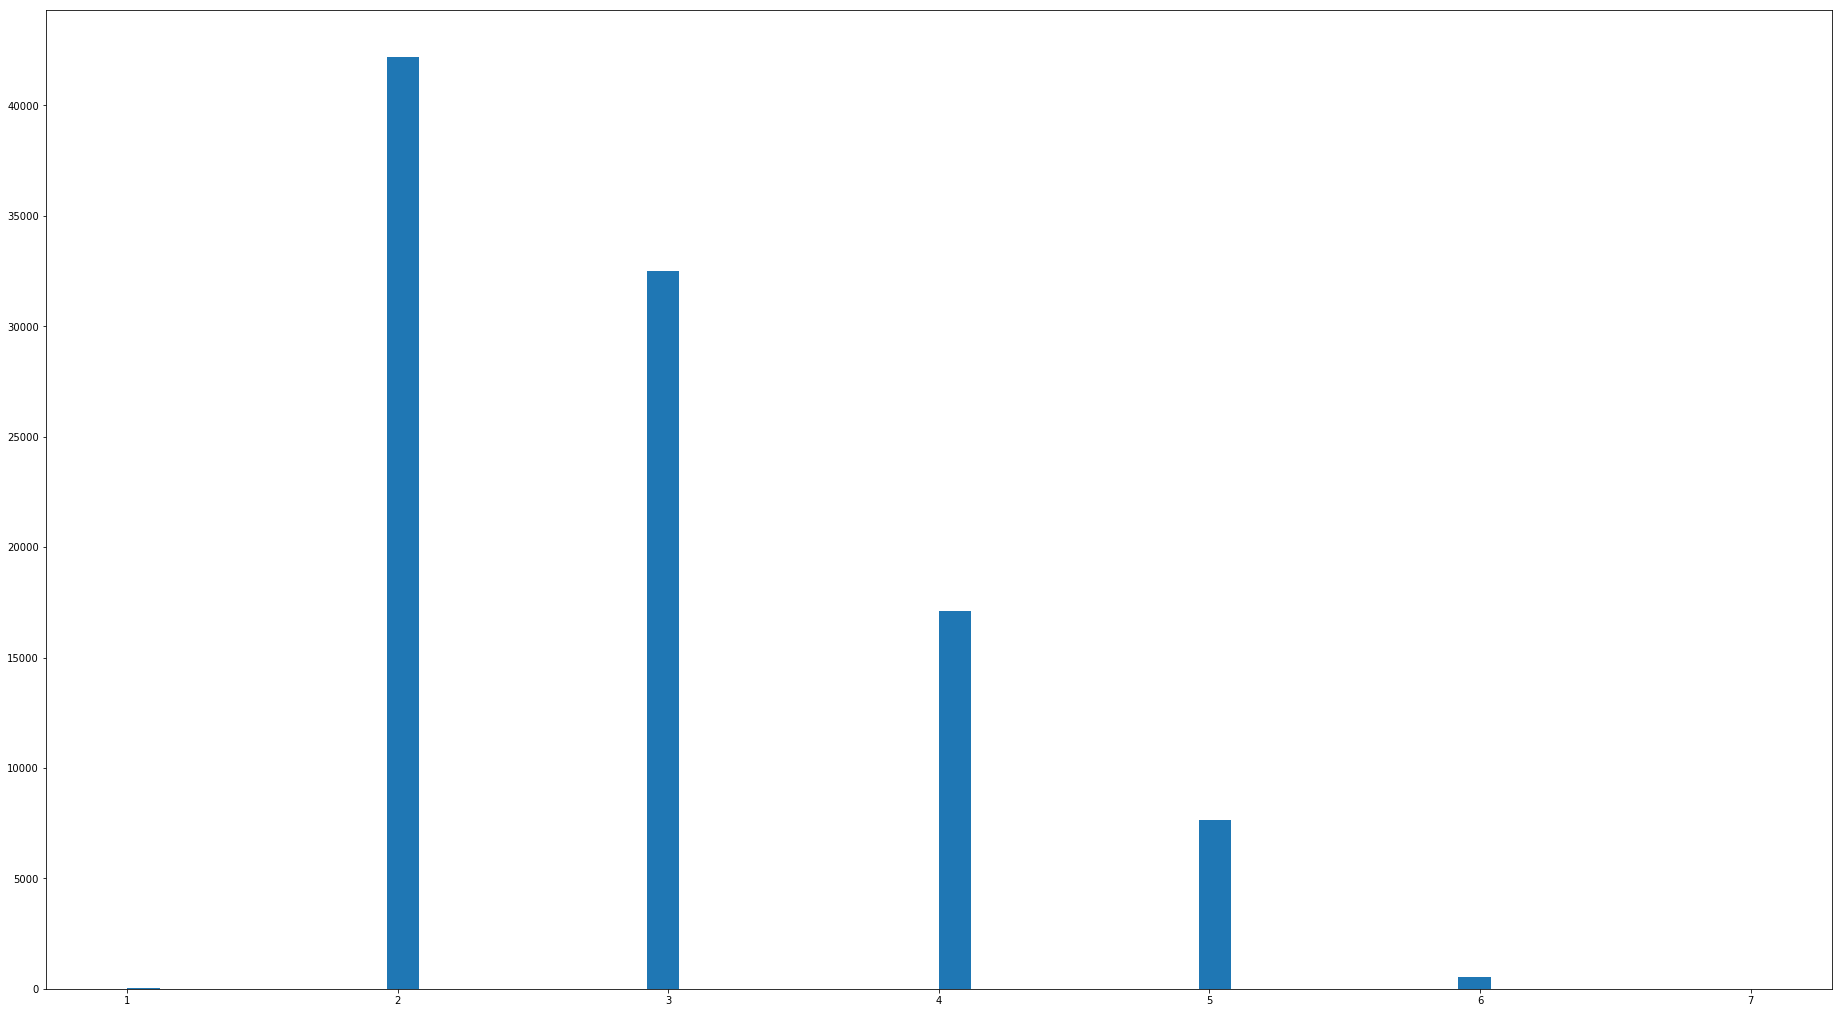

In [12]:
plt.hist(utd.place_scenarios,50);

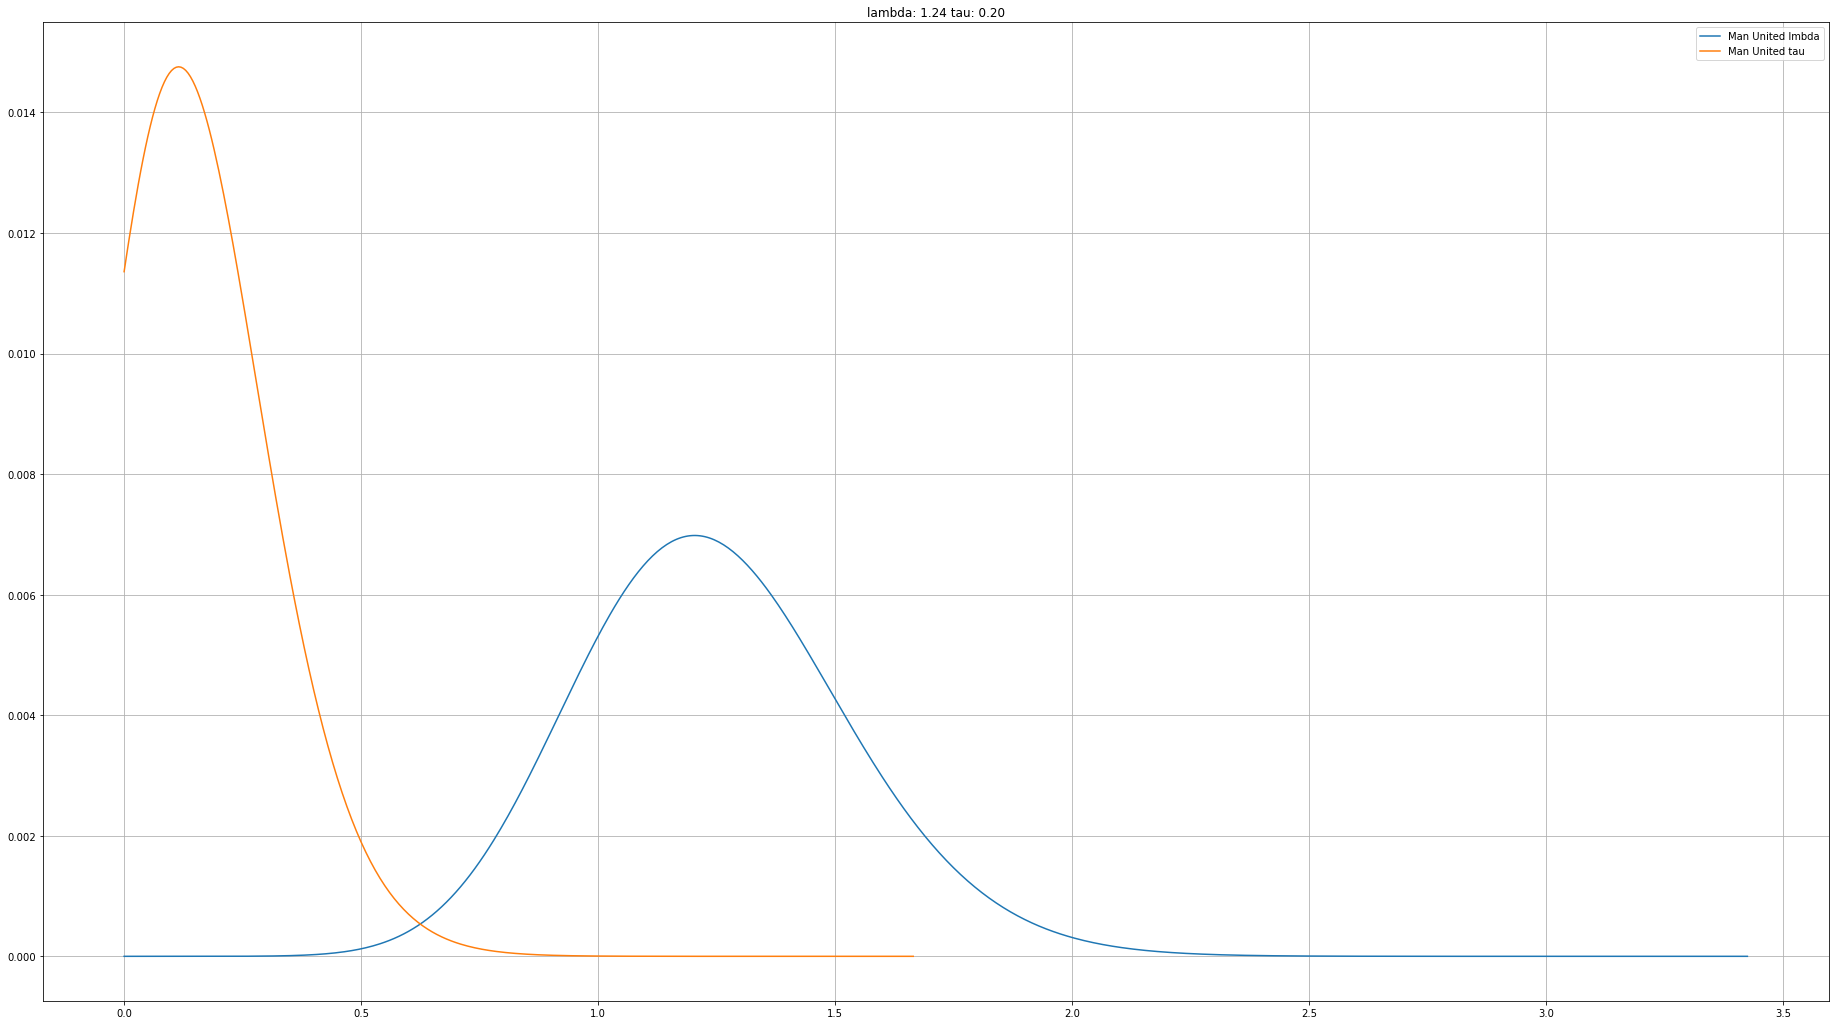

In [20]:
utd.plt()

In [15]:
(utd.place_scenarios>=5).sum()

8332

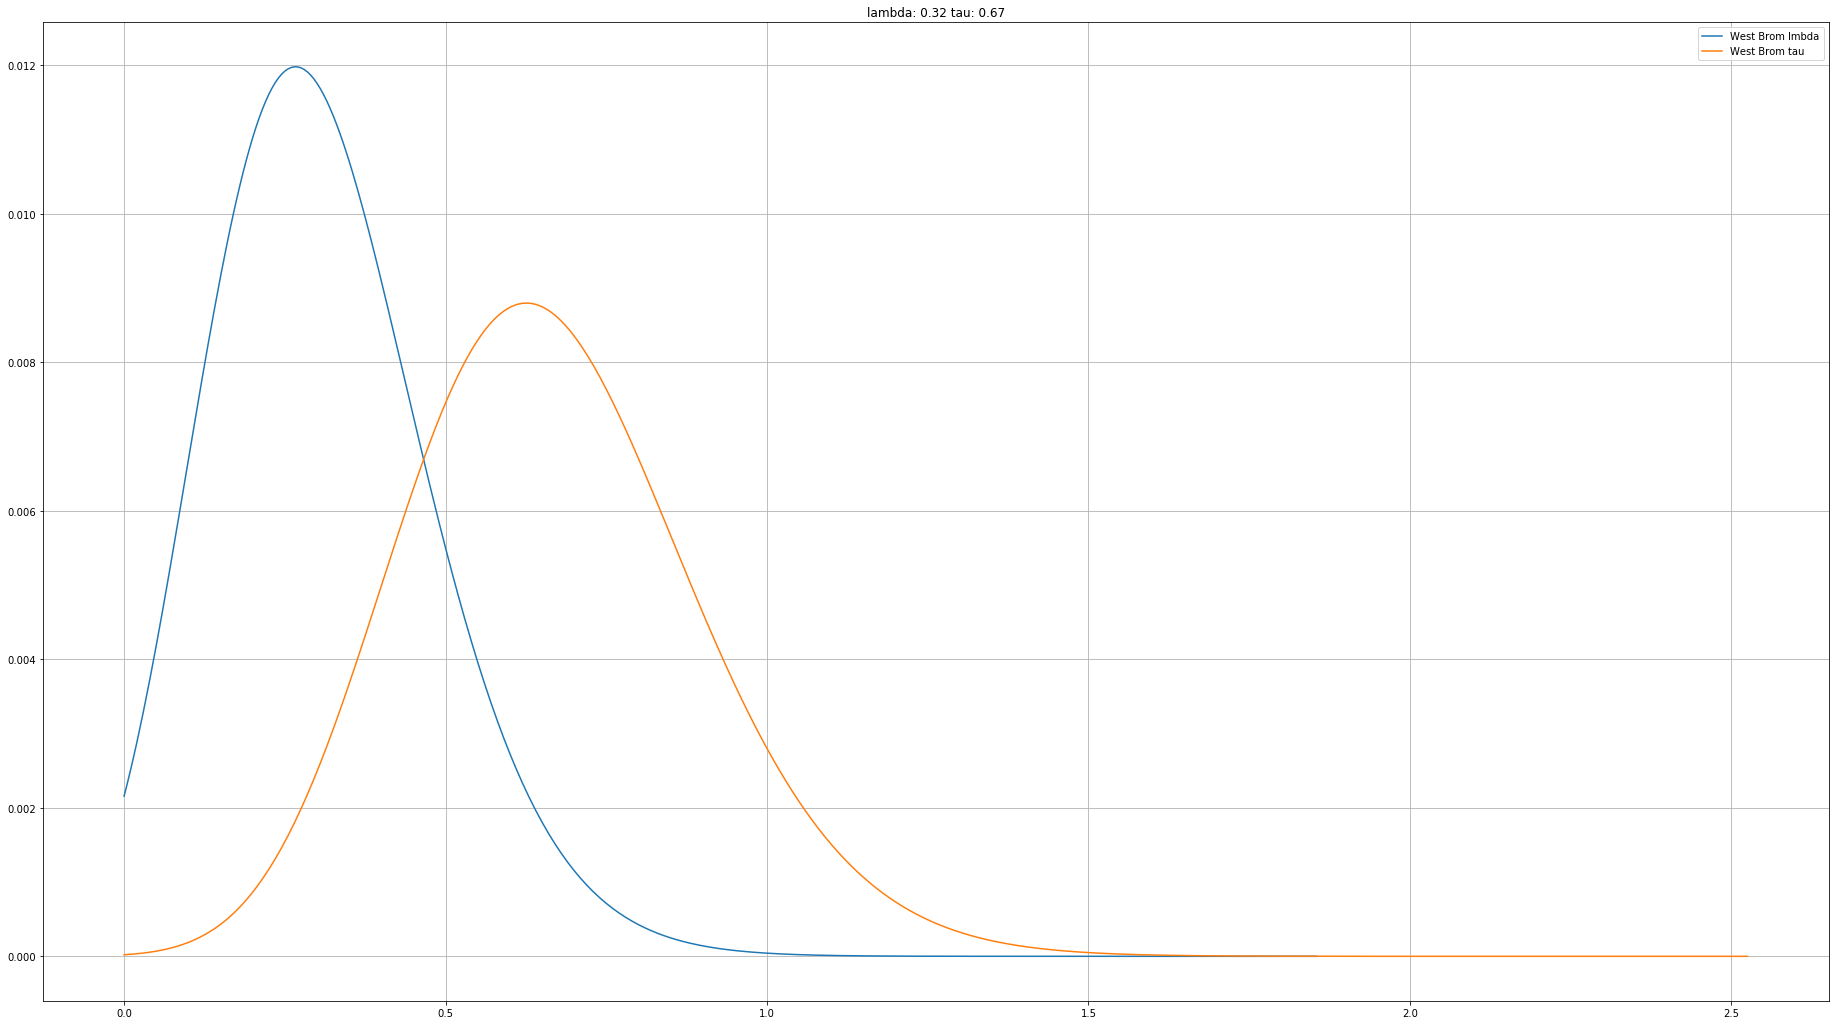

In [17]:
seasons['EN'].Teams['West Brom'].plt()